In [1]:
import pandas as pd

# Loading the dataset 
data = pd.read_csv("Titanic-Dataset.csv")

In [2]:
#Data Exploration
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
"""As the dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived, so we'll drop extra columns"""

"As the dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived, so we'll drop extra columns"

In [6]:
data.drop(['Name','Ticket','SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

In [7]:
data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin
0,1,0,3,male,22.0,7.2500,NaN
1,2,1,1,female,38.0,71.2833,C85
2,3,1,3,female,26.0,7.9250,NaN


In [8]:
# For Data Preprocessing
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Cabin          687
dtype: int64

In [9]:
# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

In [10]:
# For Data Preprocessing
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin          687
dtype: int64

In [11]:
# Dropping Cabin as there are many missing values
data.drop('Cabin', axis=1, inplace=True)  

In [12]:
# For Data Preprocessing
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [13]:
data.head(8)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
5,6,0,3,male,28.0,8.4583
6,7,0,1,male,54.0,51.8625
7,8,0,3,male,2.0,21.0750


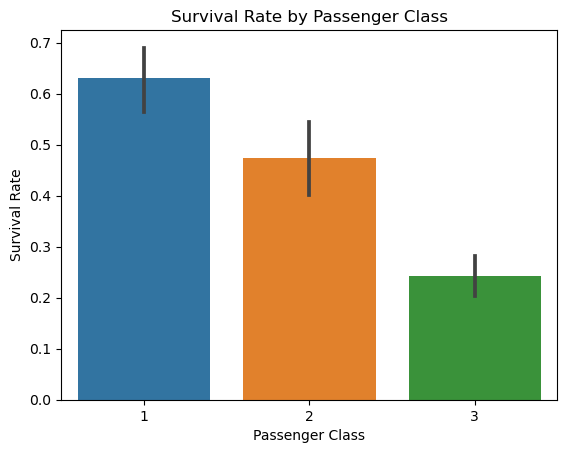

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

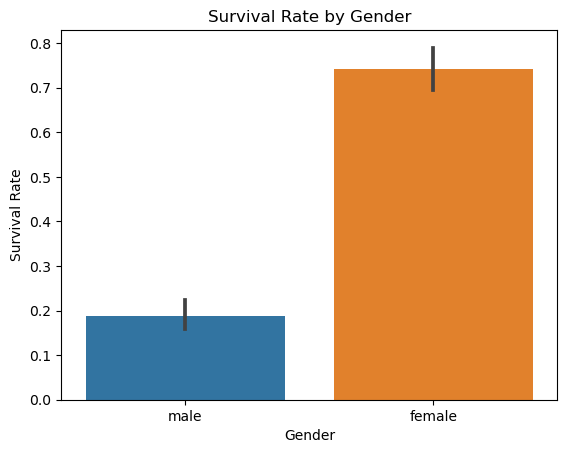

In [21]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

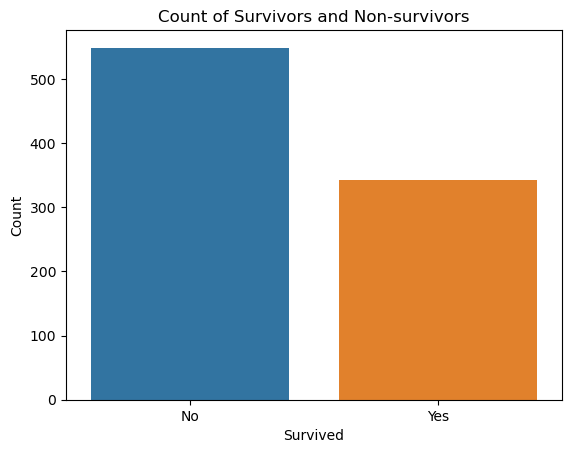

In [33]:
sns.countplot(x='Survived', data=data)
plt.title('Count of Survivors and Non-survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

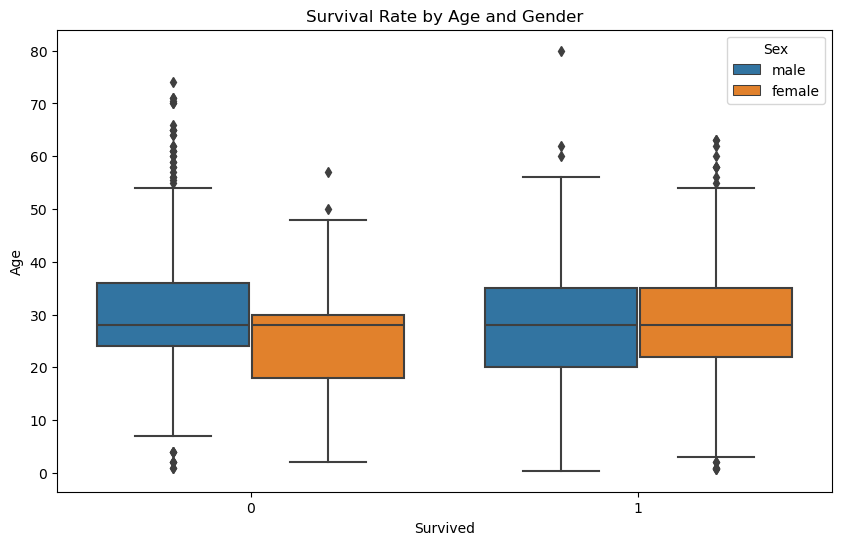

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=data)
plt.title('Survival Rate by Age and Gender')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.show()

In [35]:
# Encoding categorical variable "Sex" into numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500


In [37]:
from sklearn.model_selection import train_test_split

# Feature selection
features = ['PassengerId','Pclass','Sex', 'Age', 'Fare']
X = data[features]
y = data['Survived']

In [38]:
# Model Selection
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [40]:
# Predicting survival for the provided data
new_data = pd.DataFrame({'PassengerId': [924],
                         'Pclass': [2], 
                         'Sex': [1], 
                         'Age': [45.0], 
                         'Fare': [8.0500]
                        })
prediction = model.predict(new_data)
print("Predicted Survival for Passenger 924:", prediction[0])

Predicted Survival for Passenger 924: 1


In [41]:
# Predicting survival for the provided data
new_data = pd.DataFrame({'PassengerId': [1044],
                         'Pclass': [3], 
                         'Sex': [0], 
                         'Age': [25.0], 
                         'Fare': [6.0]
                        })
prediction = model.predict(new_data)
print("Predicted Survival for Passenger 1044:", prediction[0])

Predicted Survival for Passenger 1044: 0


In [42]:
from sklearn.tree import DecisionTreeClassifier

# train with decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [43]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [44]:
# Predicting survival for the provided data
new_data = pd.DataFrame({'PassengerId': [924],
                         'Pclass': [2], 
                         'Sex': [1], 
                         'Age': [45.0], 
                         'Fare': [8.0500]
                        })
prediction = model.predict(new_data)
print("Predicted Survival for Passenger 924:", prediction[0])

Predicted Survival for Passenger 924: 1


In [45]:
# Predicting survival for the provided data
new_data = pd.DataFrame({'PassengerId': [1044],
                         'Pclass': [3], 
                         'Sex': [0], 
                         'Age': [25.0], 
                         'Fare': [6.0]
                        })
prediction = model.predict(new_data)
print("Predicted Survival for Passenger 1044:", prediction[0])

Predicted Survival for Passenger 1044: 0
